In [1]:
#import packages
import numpy as np
import pandas as pd


In [2]:
#import dataset
dataset=pd.read_csv("spam.csv",encoding="ISO-8859-1")
dataset=dataset[['v1','v2']]
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
dataset.columns=['label','message']
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#in the dataset we are having like total of 5572 rows and there are 2 unique names in labels like (ham and spam) and there are 5169 unique messages
# and remaining all messages are duplicate and the top most unique name is ham in label column and it is of 4825 rows and finally the message
# "sorry, i'll call you later" is of 30 messages

In [7]:
#changing labels that is wherever spam is there i want to replace it with 1 and wherever ham is there , replace it with 0 by passing a dictionary
dataset['label']=dataset['label'].map({'ham':0,'spam':1})
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
#visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

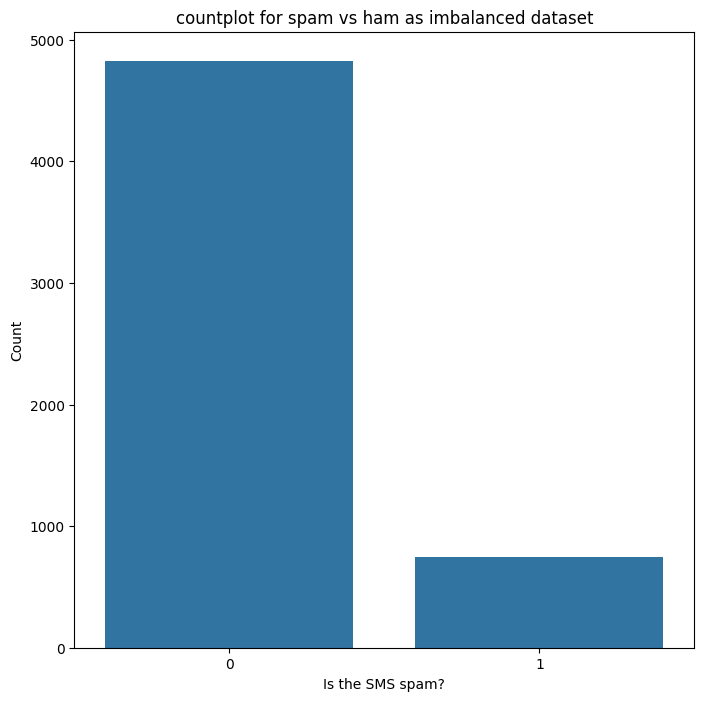

In [9]:
#countplot for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=dataset)
plt.title("countplot for spam vs ham as imbalanced dataset")
plt.xlabel("Is the SMS spam?")
plt.ylabel("Count")

In [10]:
# Handling imbalanced dataset using oversampling
only_spam=dataset[dataset['label']==1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [11]:
print("No.of spam SMS:",len(only_spam))
print("No.of ham SMS:",len(dataset)-len(only_spam))

No.of spam SMS: 747
No.of ham SMS: 4825


In [12]:
# how many times we need to append w.r.t spam messages so that we reach somewhere near to no.of ham sms i.e.4825
count=int((dataset.shape[0] - only_spam.shape[0])/only_spam.shape[0])
count

6

In [13]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
dataset.shape
    

(9307, 2)

Text(0, 0.5, 'Count')

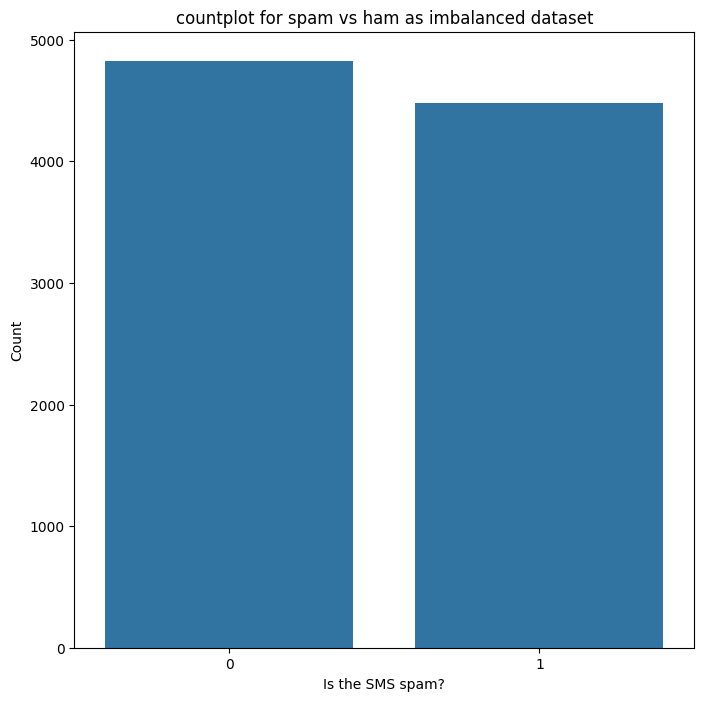

In [14]:
#countplot for spam vs ham as balanced dataset
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=dataset)
plt.title("countplot for spam vs ham as imbalanced dataset")
plt.xlabel("Is the SMS spam?")
plt.ylabel("Count")
# we are just duplicating so that ml model will understand better w.r.t spams

In [15]:
#creating new feature :word_count
dataset['word_count']=dataset['message'].apply(lambda x: len(x.split()))
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


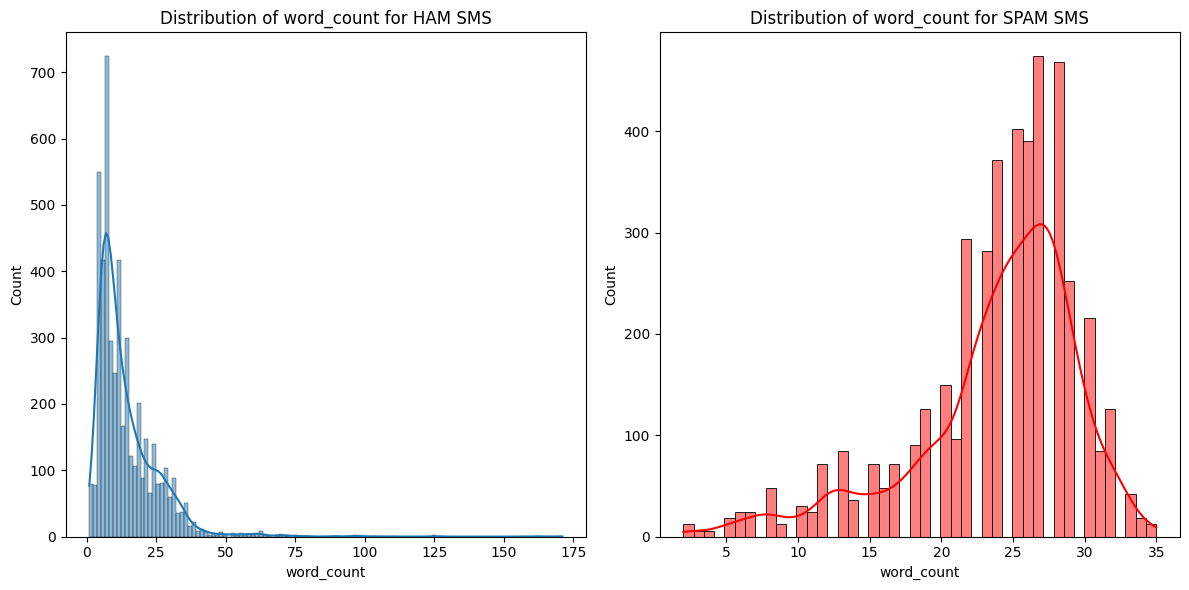

In [16]:
# distribution of ham and spam msgs w.r.t. word_count
plt.figure(figsize=(12,6))
#(1,1)
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['label']==0].word_count,kde=True)
plt.title("Distribution of word_count for HAM SMS")

#(1,2)
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['label']==1].word_count,color="red", kde=True)
plt.title("Distribution of word_count for SPAM SMS")

plt.tight_layout()
plt.show()

In [17]:
#creating new feature of containing currency symbols
def currency(data):
    currency_symbols=['€','$','£','₹','¥']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [18]:
dataset['contains_currency_symbols']=dataset['message'].apply(currency)
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


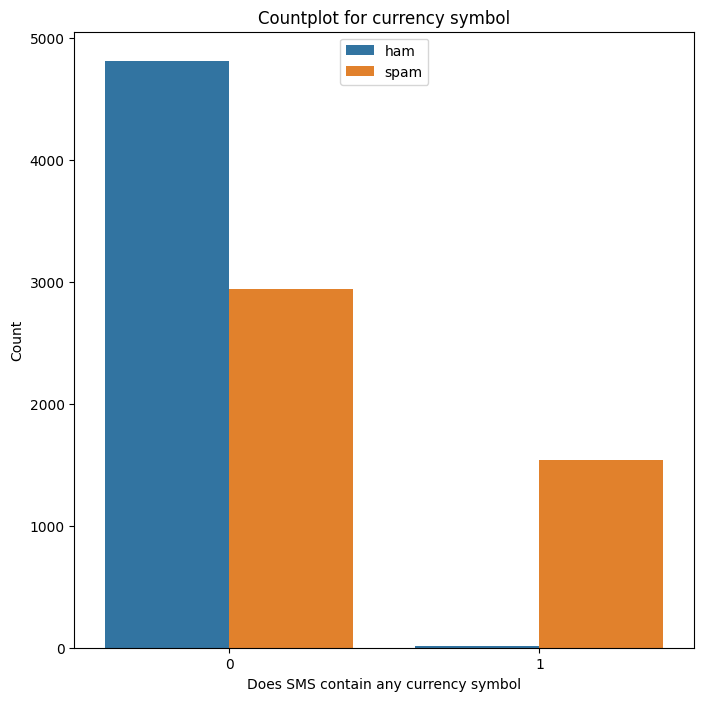

In [19]:
#countplot for contains_currency_symbols
plt.figure(figsize=(8,8))
g=sns.countplot(x="contains_currency_symbols", data=dataset, hue="label")
plt.title("Countplot for currency symbol")
plt.xlabel("Does SMS contain any currency symbol")
plt.ylabel("Count")
plt.legend(labels=['ham','spam'],loc=9)

In [20]:
# blue color is ham sms and out of all ham sms there are very less sms's which are having currency symbols 
# yellow colour is spam sms and out of all spam sms there are almost 50% of the sms are having currency symbols

In [21]:
# creating new feature of containing numbers 
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57: #ascii values 
           return 1
    return 0

In [22]:
dataset['contains_numbers']=dataset['message'].apply(number)


In [23]:
dataset

,label,message,word_count,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


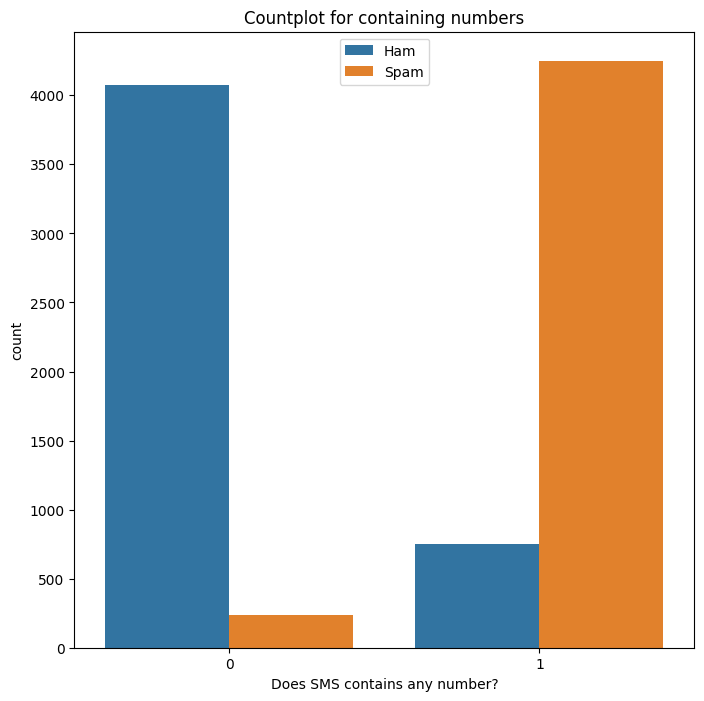

In [24]:
#countplot for containing numbers
plt.figure(figsize=(8,8))
g=sns.countplot(x="contains_numbers",data=dataset,hue="label")
plt.title("Countplot for containing numbers")
plt.xlabel("Does SMS contains any number?")
plt.ylabel("count")
plt.legend(labels=['Ham','Spam'],loc=9)

In [25]:
# Data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pkund\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pkund\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
corpus=[]
wnl=WordNetLemmatizer()
for sms in list(dataset.message):
    message=re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms) # filtering out special characters and numbers
    message=message.lower()
    words=message.split() #Tokenizer
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemmatized_words=[wnl.lemmatize(word) for word in filtered_words]
    message=" ".join(lemmatized_words)
    corpus.append(message)

In [27]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [28]:
# creating a bag of words model
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
#Term Frequency Inverse Document Frequency Vectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [29]:
X = pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']

In [30]:
# getting cross-validation report classification problem and also creating a confusion matrix
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#training our model
# naive bayes model
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb,X,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.944
0.004


In [33]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



array([[908,  50],
       [ 57, 847]])

Text(70.72222222222221, 0.5, 'predicted values')

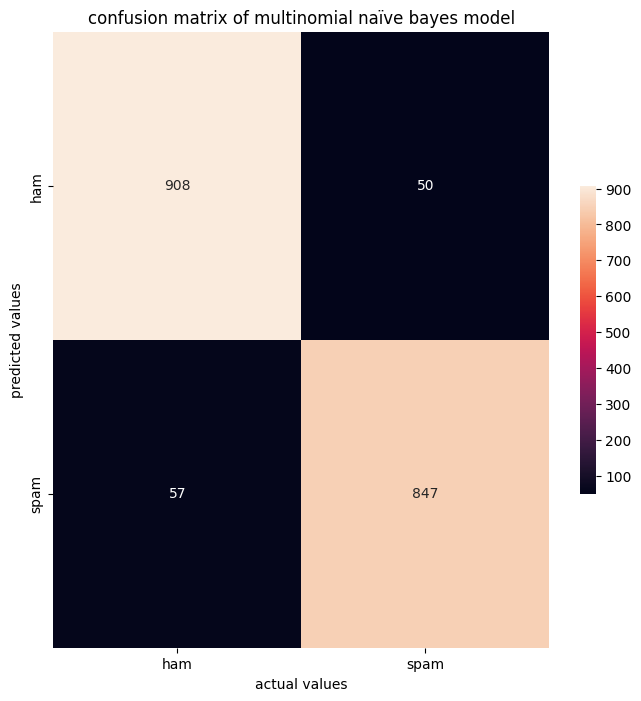

In [35]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g=sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={'shrink':0.5})
plt.title("confusion matrix of multinomial naïve bayes model")
plt.xlabel("actual values")
plt.ylabel("predicted values")

In [36]:
#DECISION TREES
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt,X,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.981
0.005


In [37]:
dt.fit(X_train,y_train)
y_pred1=dt.predict(X_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



array([[908,  50],
       [ 57, 847]])

Text(70.72222222222221, 0.5, 'predicted values')

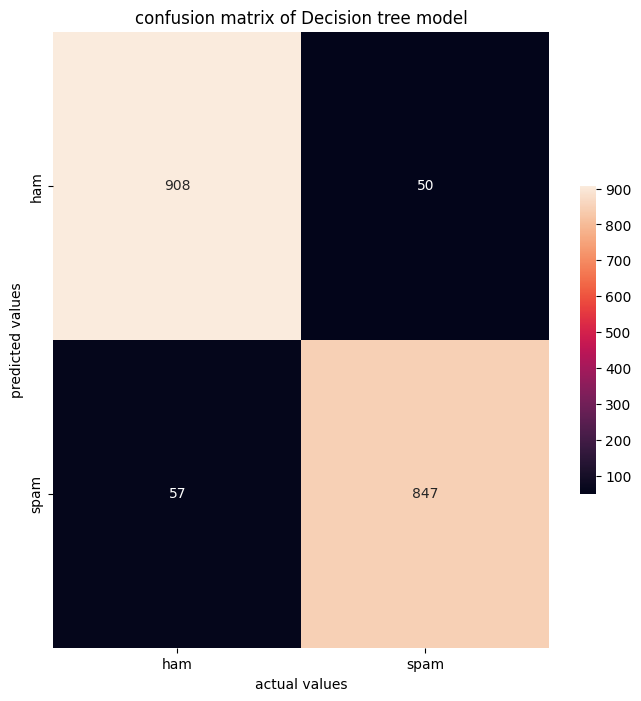

In [38]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g=sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={'shrink':0.5})
plt.title("confusion matrix of Decision tree model")
plt.xlabel("actual values")
plt.ylabel("predicted values")

In [39]:
def predict_spam(sms):
    message=re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms) # filtering out special characters and numbers
    message=message.lower()
    words=message.split() #Tokenizer
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemmatized_words=[wnl.lemmatize(word) for word in filtered_words]
    message=" ".join(lemmatized_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [45]:
sample_message= "Your package is on the way! Click here to schedule your delivery"
if predict_spam(sample_message):
	print("Gotcha! This is a spam message")
else:
    print("This is HAM message")

This is HAM message


C:\Users\pkund\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
